<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Problem-Identification-and-Data-wrangling" data-toc-modified-id="Problem-Identification-and-Data-wrangling-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Problem Identification and Data wrangling<a id="1_Problem_Identification_Data_wrangling"></a></a></span><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Introduction<a id="1.1_Introduction"></a></a></span></li><li><span><a href="#Problem-Identification" data-toc-modified-id="Problem-Identification-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Problem Identification<a id="1.2_Problem_Identification"></a></a></span><ul class="toc-item"><li><span><a href="#Column-Description" data-toc-modified-id="Column-Description-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Column Description<a id="1.2.1_Column_Description"></a></a></span></li></ul></li><li><span><a href="#Imports" data-toc-modified-id="Imports-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Imports<a id="1.3_Imports"></a></a></span></li><li><span><a href="#Loading-the-Data" data-toc-modified-id="Loading-the-Data-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Loading the Data<a id="1.4_Loading_Data"></a></a></span></li></ul></li><li><span><a href="#Data-Wrangling" data-toc-modified-id="Data-Wrangling-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data Wrangling<a id="2.0_Data_Wrangling"></a></a></span><ul class="toc-item"><li><span><a href="#Exploring-the-Data" data-toc-modified-id="Exploring-the-Data-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Exploring the Data<a id="2.1_Exploring_Data"></a></a></span><ul class="toc-item"><li><span><a href="#Finding-Missing-Values" data-toc-modified-id="Finding-Missing-Values-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Finding Missing Values<a id="2.2.1_Finding_Missing_Values"></a></a></span></li><li><span><a href="#Checking-Data-Quality" data-toc-modified-id="Checking-Data-Quality-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>Checking Data Quality<a id="2.2.2_Checking_Data_Quality"></a></a></span></li></ul></li></ul></li><li><span><a href="#Data-Wrangling-Summary" data-toc-modified-id="Data-Wrangling-Summary-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Data Wrangling Summary<a id="3.0_Data_Wrangling_Summary"></a></a></span></li></ul></div>

# Problem Identification and Data wrangling<a id='1_Problem_Identification_Data_wrangling'></a>

## Introduction<a id='1.1_Introduction'></a>

The focus of this step will be to source, collect, understand and organize the data. Some obvious data cleaning steps may be taken here but the overall focus will be on exploring the data to understand it better.

Data Source: <a href= "https://www.kaggle.com/ntnu-testimon/paysim1" target="_blank">PaySim Financial Data</a> 

Due to privacy involved with the financial transactions, the availability of the public dataset for the financial transaction focused on finding frauds is extremely challenging. Hence PaySim generated the synthetic dataset that resembles closely to the private transactional data as well as injected few malicious transactions to evaluate the fraud detection models.

PaySim simulated mobile money transactions based on a sample of real transactions extracted from one month of financial logs from a mobile money service implemented in an African country.

The data science methodology for the overall analysis for this project is shown in the below picture:

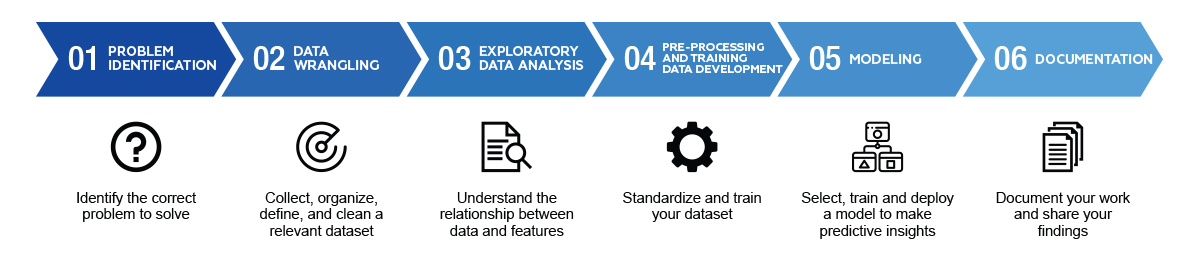

## Problem Identification<a id='1.2_Problem_Identification'></a>

This is the first stage of our process of the data science methodology (DSM) as shown below:

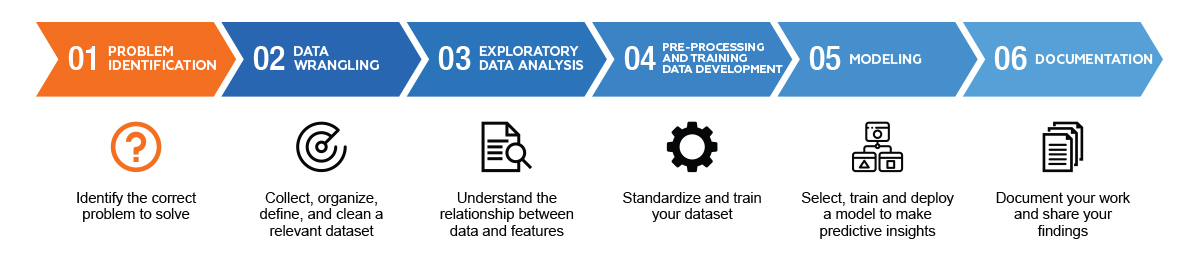

The focus of the solution will be as follow:

- Identify the insights from the dataset
- Find the best fitted solution to identify the financial transaction frauds based on different machine learning models

### Column Description<a id='1.2.1_Column_Description'></a>

This is a sample of 1 row with headers explanation:

1,PAYMENT,1060.31,C429214117,1089.0,28.69,M1591654462,0.0,0.0,0,0

**step** - maps a unit of time in the real world. In this case 1 step is 1 hour of time. Total steps 744 (30 days simulation).

**type** - CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER.

**amount** - amount of the transaction in local currency.

**nameOrig** - customer who started the transaction

**oldbalanceOrg** - initial balance before the transaction

**newbalanceOrig** - new balance after the transaction

**nameDest** - customer who is the recipient of the transaction

**oldbalanceDest** - initial balance recipient before the transaction. Note that there is not information for customers that start with M (Merchants).

**newbalanceDest** - new balance recipient after the transaction. Note that there is not information for customers that start with M (Merchants).

**isFraud** - This is the transactions made by the fraudulent agents inside the simulation. In this specific dataset the fraudulent behavior of the agents aims to profit by taking control or customers accounts and try to empty the funds by transferring to another account and then cashing out of the system.

**isFlaggedFraud** - The business model aims to control massive transfers from one account to another and flags illegal attempts. An illegal attempt in this dataset is an attempt to transfer more than 200.000 in a single transaction.

## Imports<a id='1.3_Imports'></a>

In [1]:
# Importing the required packages, libraries and utilities at one place to keep it clean
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline
from library.sb_utils import save_file

import missingno as msno

# dataframe display settings
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# ignoring warnings
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

## Loading the Data<a id='1.4_Loading_Data'></a>

In [2]:
# Loading the csv data file here from the raw-data folder
data = pd.read_csv('../FinancialFraudDetection/raw-data/PS_20174392719_1491204439457_log.csv')

In [3]:
# Checking imported data
print(f"Total rows are {data.shape[0]} and total columns are {data.shape[1]}.")

# checking data columns and overall look of the imported data
data.head()

Total rows are 6362620 and total columns are 11.


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


# Data Wrangling<a id='2.0_Data_Wrangling'></a>

The focus during the data wrangling phase will be on loading the data, checking the structure of the data, quality of the data and checking if there is right type of information available. Also if there is any missing information, then deciding what methods to use to fill the gap.

## Exploring the Data<a id='2.1_Exploring_Data'></a>

In [4]:
# checking the data type
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


### Finding Missing Values<a id='2.2.1_Finding_Missing_Values'></a>

In [5]:
# Finding missing values in the data
pd.DataFrame(zip(data.columns,
                 data.isna().any(),
                (data.isna().sum() / data.shape[0]) * 100),
             columns=['Column', 'Missing Values', '% Missing Values'])\
    .sort_values('% Missing Values', ascending=False)

,Column,Missing Values,% Missing Values
0,step,False,0.0
1,type,False,0.0
2,amount,False,0.0
3,nameOrig,False,0.0
4,oldbalanceOrg,False,0.0
5,newbalanceOrig,False,0.0
6,nameDest,False,0.0
7,oldbalanceDest,False,0.0
8,newbalanceDest,False,0.0
9,isFraud,False,0.0


<AxesSubplot:>

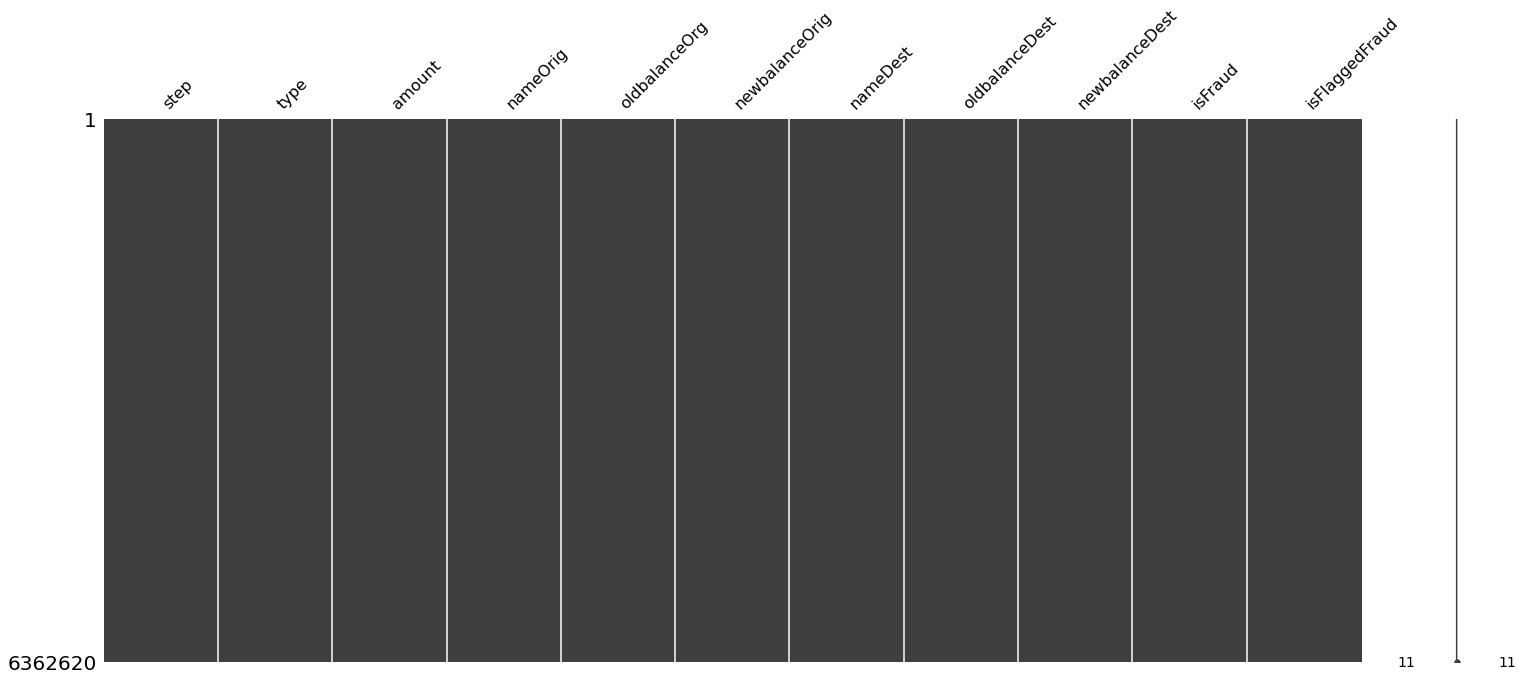

In [6]:
# Using the msno package to verify the missing values
msno.matrix(data)

Based on the above analysis, it is certain that there are no missing values.

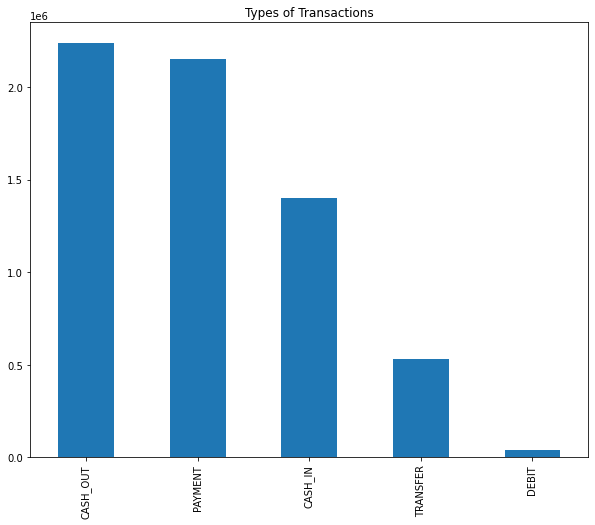

In [7]:
# Checking different types of transactions
plt.figure(figsize=(10, 8))
plt.title("Types of Transactions")
data.type.value_counts().plot(kind='bar')
plt.show()

In [8]:
# Checking which transaction type has the fradulent transactions

print("List of transaction types with fraud values: ",list(data.loc[data.isFraud == 1].type.drop_duplicates().values))

List of transaction types with fraud values:  ['TRANSFER', 'CASH_OUT']


In [9]:
# Finding number of potential fraud transactions for 'CASH_OUT' and 'TRANSFER' types
transfer_frauds = data.loc[(data.isFraud==1) & (data.type=='TRANSFER')]
cashout_frauds = data.loc[(data.isFraud==1) & (data.type=='CASH_OUT')]
print("Total number of transfer frauds are {}".format(len(transfer_frauds)))
print("Total number of cash-out frauds are {}".format(len(cashout_frauds)))

Total number of transfer frauds are 4097
Total number of cash-out frauds are 4116


- The 'CASH_OUT' potential frauds are those frauds where money is paid to a merchant where there may be some arrangement between the fraudster and the merchant for siphoning the money.
- The 'TRANSFER' potential frauds are those frauds where money is sent to another customer

### Checking Data Quality<a id='2.2.2_Checking_Data_Quality'></a>

The target column here is 'isFraud' which communicates if the transaction is a fradulent one or not. There is also another column labeled as 'isFlaggedFraud'. I am going to check the quality of both columns and decide the action plan as keeping the target column clean is extremely important for the success of this project.

In [10]:
# Checking the need of 'isFlaggedFraud' column accurate against 'isFraud' column
print("Total 'isFraud' transactions: ",data.isFraud.value_counts())
print("Total 'isFlaggedFraud' transactions: ",data.isFlaggedFraud.value_counts())

Total 'isFraud' transactions:  0    6354407
1       8213
Name: isFraud, dtype: int64
Total 'isFlaggedFraud' transactions:  0    6362604
1         16
Name: isFlaggedFraud, dtype: int64


The above result confirms that while there are a potential of 8,213 fraud transactions, the transactions flagged as frauds under column 'isFlaggedFraud' are only 16 based on the current business algorithm. The column 'isFlaggedFraud' seems not much useful, hence I am dropping it to solely focus on the 'isFraud' column during the exploratory data analysis phase.

In [11]:
# Dropping the column 'isFlaggedFraud' from the data
data.drop('isFlaggedFraud', axis=1, inplace=True)
data_clean = data.reset_index()

In [12]:
# Checking the clean data
data_clean.head()

,index,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1
3,3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1
4,4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0


In the next phase of the Exploratory Data Analysis, I will focus on understanding more about the given columns, data types, data insights and more.

In [13]:
# Saving the Data Wrangling phase data into a new datafile for further use in the EDA notebook
datapath = '../FinancialFraudDetection/data'
save_file(data_clean, 'data_eda.csv', datapath)

A file already exists with this name.

Do you want to overwrite? (Y/N)Y
Writing file.  "../FinancialFraudDetection/data\data_eda.csv"


# Data Wrangling Summary<a id='3.0_Data_Wrangling_Summary'></a>

The focus of the data wrangling phase was to source, collect and load the data for the project. After loading the data, the type of the data and the different types of columns were identified.

The main focus afterwards was to explore if there were any missing values. As there were no missing values, no imputing was done.

For the next phase of Explorator Data Analysis, please click at the below link:

<a href="http://example.com/" target="_blank">To be done</a>